# PSOSM Assignment 2

## Facebook Graph API

In [245]:
#!/usr/bin/env python
# coding=utf-8
import facebook, json, ast, urllib3, requests
import matplotlib.pyplot as plt
%matplotlib inline
from twython import Twython
from collections import Counter
import time
import collections

In [210]:
token = "EAAHH6Hycz8oBAERbJKuHwH3UgZAcTvv5CXZBGwtcfBkREJAIcMxEfY5szuZCA3AXZC2I0cybcDP7lerHIHwjHvzg3KIcGxdt8wBY184lzSZCHRZCgCzKB3IVJXwgtHKcLBHgTn1ZCIOMZBWEmnVITskXU5sZCUvtheSVIggjyWrvkDyknjdYECbfb1Fl9ZBCsVvyAgPaNnsFdwVgZDZD"
version = "2.12"
graph = facebook.GraphAPI(access_token=token, version=version)

### Collecting posts in news feed

It is not possible to collect the news feed of a user since an application requires the `user_posts` permission from the user. For the application to request such permission, it first needs to be approved from the Facebook development team. Since I do not have such approval from the Facebook team, I skipped this question.

However, if I did have approval, the Python code would be as follows:-
```python
news_feed = graph.request("/me/home")
```

Reference: [Facebook documentation](https://developers.facebook.com/docs/facebook-login/permissions/#reference-user_posts)

### Collecting posts in timeline

In [211]:
# Using ast to remove unicode characters, found this neat hack online
timeline = ast.literal_eval(json.dumps(graph.request("/me/feed")))

### Finding reactions of a post

In [73]:
def getReactions(post_id):
    reacts = graph.request("/" + post_id + "?fields=reactions.type(LOVE).limit(0).summary(total_count).as(reactions_love),reactions.type(WOW).limit(0).summary(total_count).as(reactions_wow),reactions.type(HAHA).limit(0).summary(total_count).as(reactions_haha),reactions.type(LIKE).limit(0).summary(total_count).as(reactions_like),reactions.type(ANGRY).limit(0).summary(total_count).as(reactions_angry),reactions.type(SAD).limit(0).summary(total_count).as(reactions_sad)")
    reacts = ast.literal_eval(json.dumps(reacts))
    return reacts

In [74]:
timeline_reacts = []
for post in timeline['data']:
    post_reactions = getReactions(post['id'])
    if 'message' in post:
        post_reactions['words'] = len(post['message'].split())
    else:
        post_reactions['words'] = 0
    timeline_reacts.append(post_reactions)

In [88]:
# the indices represent number of words, values represent number of reacts
histogram_reactions = [0] * 50
histogram_like = [0] * 50
histogram_love = [0] * 50
histogram_sad = [0] * 50
histogram_angry = [0] * 50
histogram_haha = [0] * 50
histogram_wow = [0] * 50

In [89]:
for react_data in timeline_reacts:
    histogram_like[react_data['words']] += react_data['reactions_like']['summary']['total_count']
    histogram_sad[react_data['words']] += react_data['reactions_sad']['summary']['total_count']
    histogram_angry[react_data['words']] += react_data['reactions_angry']['summary']['total_count']
    histogram_wow[react_data['words']] += react_data['reactions_wow']['summary']['total_count']
    histogram_haha[react_data['words']] += react_data['reactions_haha']['summary']['total_count']
    histogram_love[react_data['words']] += react_data['reactions_love']['summary']['total_count']

In [90]:
temp_list = [histogram_like, histogram_love, histogram_sad, histogram_angry, histogram_haha, histogram_wow]
histogram_reactions = [sum(x) for x in zip(*temp_list)]

#### No of words vs Total Reactions
It is clear that the lesser the number of words in a post, the greater the reaction. This trend can be seen across all the different reactions

Text(0,0.5,'Total Reacts')

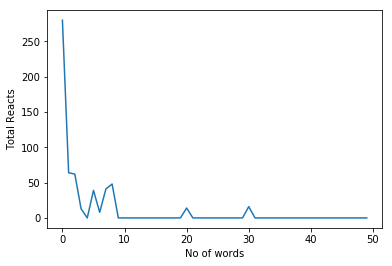

In [107]:
plt.plot(histogram_reactions)
plt.xlabel("No of words")
plt.ylabel("Total Reacts")

#### No of words vs Likes

Text(0,0.5,'Likes')

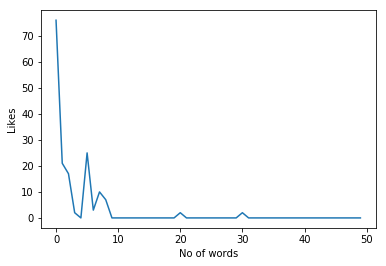

In [108]:
plt.plot(histogram_like)
plt.xlabel("No of words")
plt.ylabel("Likes")

#### No of words vs Angry Reacts

Text(0,0.5,'Angry Reacts')

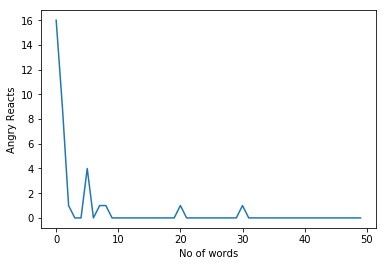

In [109]:
plt.plot(histogram_angry)
plt.xlabel("No of words")
plt.ylabel("Angry Reacts")

#### No of words vs Sad Reacts

Text(0,0.5,'Sad Reacts')

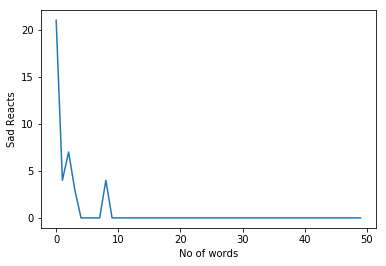

In [110]:
plt.plot(histogram_sad)
plt.xlabel("No of words")
plt.ylabel("Sad Reacts")

#### No of words vs Love Reacts

Text(0,0.5,'Love Reacts')

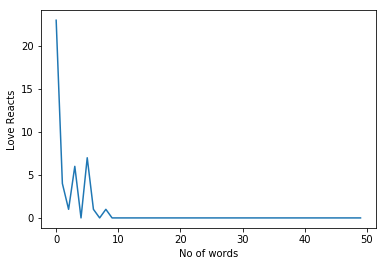

In [111]:
plt.plot(histogram_love)
plt.xlabel("No of words")
plt.ylabel("Love Reacts")

#### No of words vs Wow Reacts
Wow reacts seem to be an exception since there seem to be large number of wow reacts for #words < 10

Text(0,0.5,'Wow Reacts')

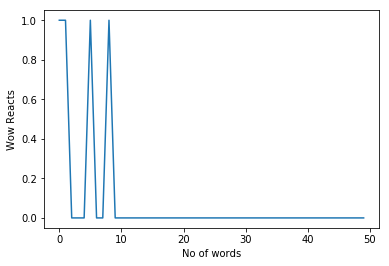

In [112]:
plt.plot(histogram_wow)
plt.xlabel("No of words")
plt.ylabel("Wow Reacts")

#### No of words vs Haha Reacts

Text(0,0.5,'Haha Reacts')

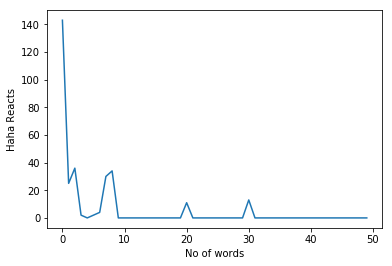

In [113]:
plt.plot(histogram_haha)
plt.xlabel("No of words")
plt.ylabel("Haha Reacts")

### Given token of person A, collect person B's info

Without Facebook reviewing the application, it is not possible to get the required permissions to do this question. It is not possile to find out any information about any user apart from the one whose access token you have. Once we get the required permissions, the following piece of code would get information of other users:-
```python
user_info = graph.request("/{user-id}")
```

Reference: [Facebook documentation](https://developers.facebook.com/docs/graph-api/reference/v2.2/user)

## Twitter API

In [143]:
APP_KEY = "qiOaRLVPldazXmYmF3IaIQw4L" #Consumer key
APP_SECRET = "FAzcCMF1UUyuNuSeddAA1nDJYPeXm6OhaCD084k1t3BZ0HleCY" #Consumer secret
OAUTH_TOKEN = "717220472623071233-oeDgXLyYdqT92Mi06aaAGV7EtSExfKS" # Access token
OAUTH_TOKEN_SECRET = "tVh6WAqVqJ5Pekb3skPON4OD46dyyBAIGOiWjPkZrtglC" #Access token secret
twitter = Twython(APP_KEY,APP_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET)

### Collecting tweets from 1 Sept 2018 to 5 Oct 2018

#### Bangalore

In [195]:
data_bglore1 = twitter.get_user_timeline(screen_name='BlrCityPolice', tweet_mode='extended', count = 10000, since_id='1041219775324536832', max_id = '1048217088173588481')
data_bglore2 = twitter.get_user_timeline(screen_name='BlrCityPolice', tweet_mode='extended', count = 10000, since_id='1035758803189256192', max_id = '1041219775324536832')
bnglr_tweets = data_bglore1 + data_bglore2
bnglr_tweets = ast.literal_eval(bnglr_tweets)

ValueError: malformed string

#### Baltimore

In [235]:
data_blm1 = twitter.get_user_timeline(screen_name='BaltimorePolice', tweet_mode='extended', count = 10000, since_id='1041219775324536832', max_id = '1048217088173588481')
data_blm2 = twitter.get_user_timeline(screen_name='BaltimorePolice', tweet_mode='extended', count = 10000, since_id='1035758803189256192', max_id = '1041219775324536832')
blm_tweets = data_blm1 + data_blm2

### Activeness on Twitter

#### Bangalore

Text(0.5,0,'Day')

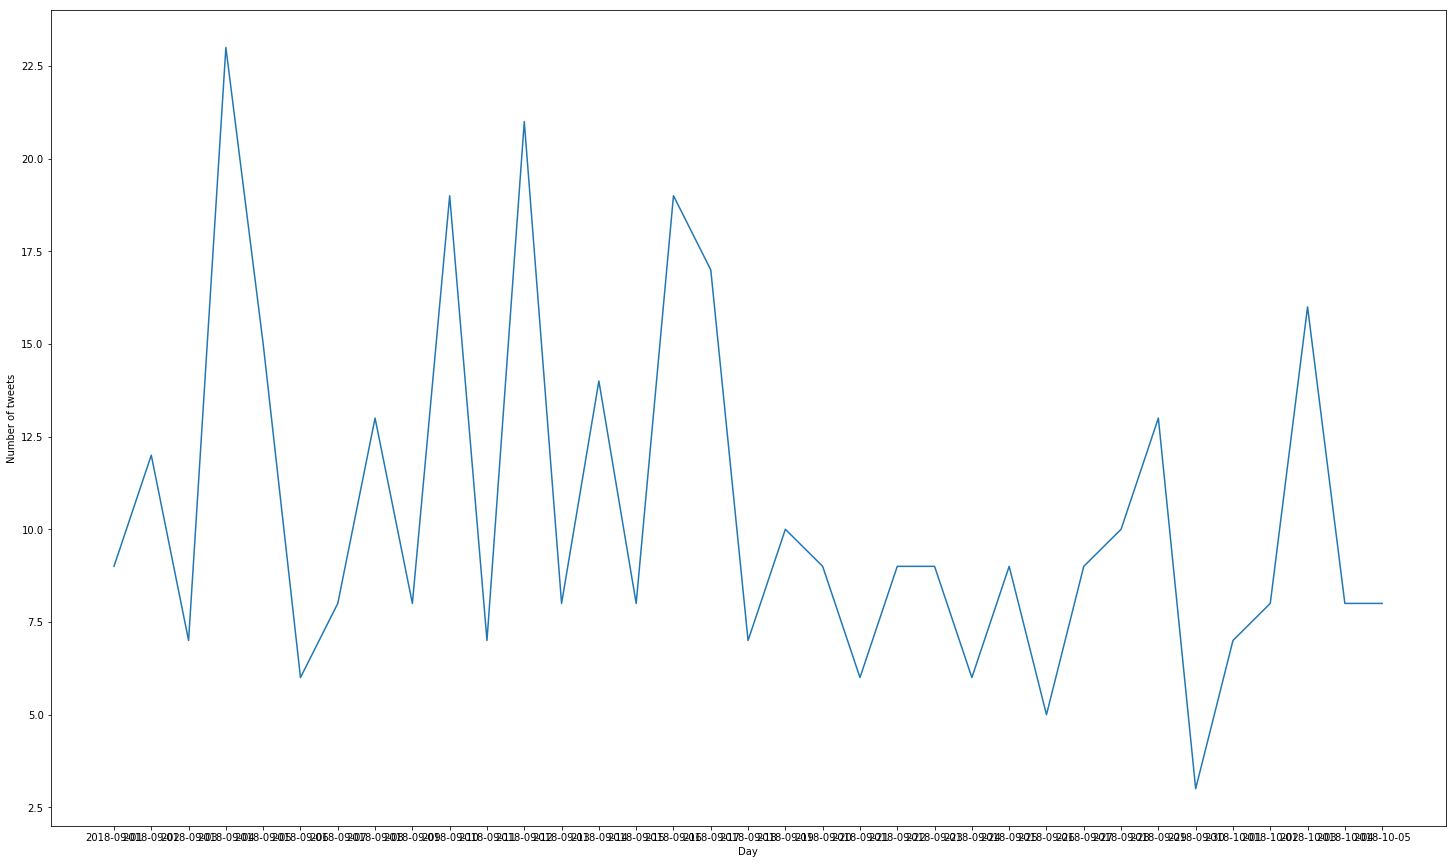

In [163]:
bnglr_dic = {}
for data in bnglr_tweets:
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(data['created_at'], '%a %b %d %H:%M:%S +0000 %Y'))
    day = str(date.split(' ')[0])
    if day in bnglr_dic:
        bnglr_dic[day] += 1
    else:
        bnglr_dic[day] = 1
ordered_bnglr_dict = collections.OrderedDict(sorted(bnglr_dic.items()))
x = []
y = []
for k, v in ordered_bnglr_dict.items():
    x.append(k)
    y.append(v)
fig1 = plt.figure(figsize=(25, 15))
axes = plt.gca()
plt.plot(x, y)
plt.ylabel('Number of tweets')
plt.xlabel('Day')

#### Baltimore

Text(0.5,0,'Day')

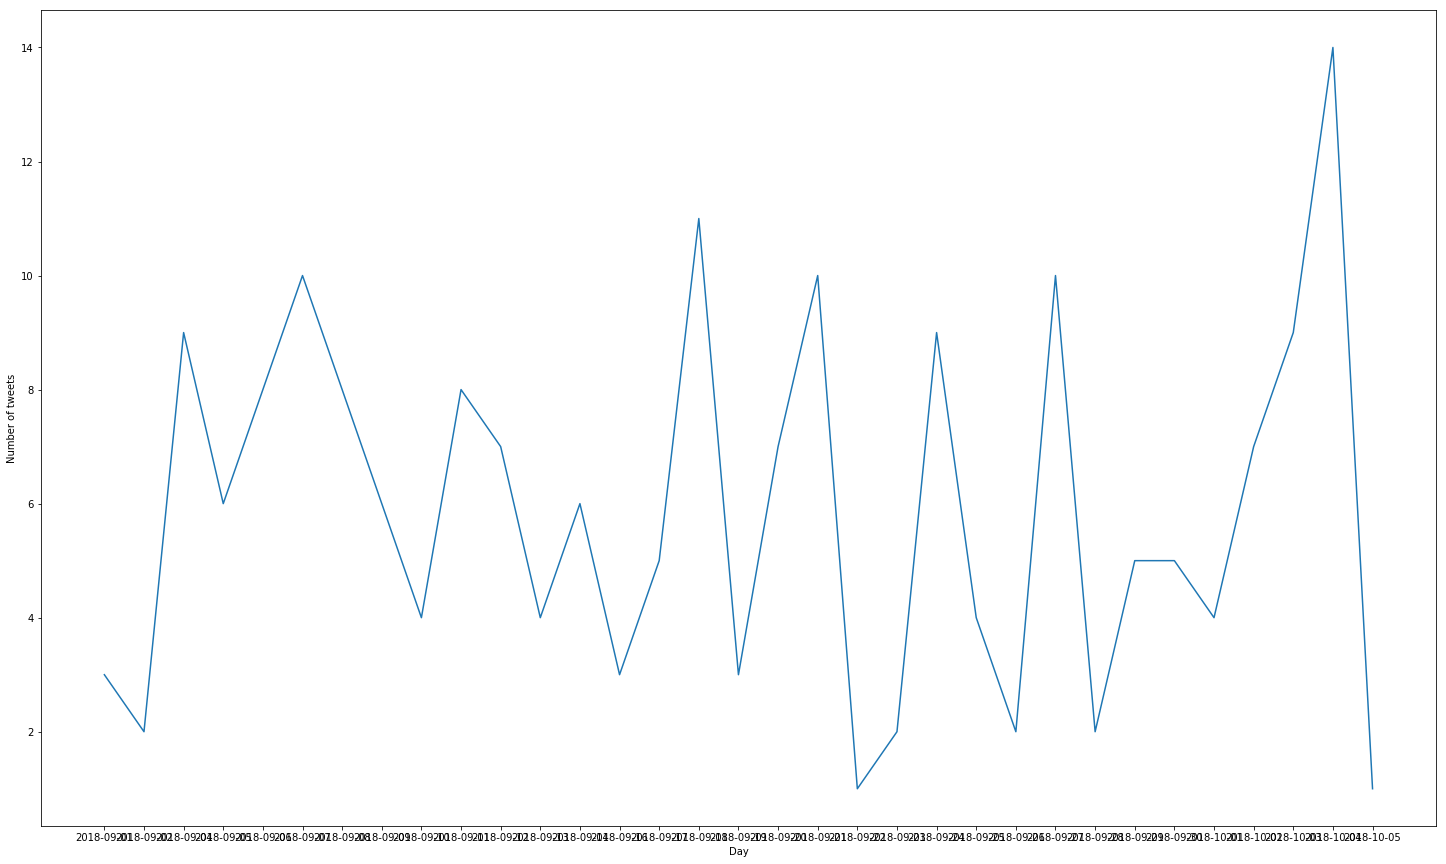

In [164]:
blm_dic = {}
for data in blm_tweets:
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(data['created_at'], '%a %b %d %H:%M:%S +0000 %Y'))
    day = str(date.split(' ')[0])
    if day in blm_dic:
        blm_dic[day] += 1
    else:
        blm_dic[day] = 1
ordered_blm_dict = collections.OrderedDict(sorted(blm_dic.items()))
x = []
y = []
for k, v in ordered_blm_dict.items():
    x.append(k)
    y.append(v)
fig1 = plt.figure(figsize=(25, 15))
axes = plt.gca()
plt.plot(x, y)
plt.ylabel('Number of tweets')
plt.xlabel('Day')

### User response to tweets

Function used to calculate score: 3*retweet_count + favourite_count

#### Bangalore

In [205]:
score = 0
for data in bnglr_tweets:
    score += (data['favorite_count']+3*data['retweet_count'])
print "Score:", score/len(bnglr_tweets)

Score: 73


#### Baltimore

In [206]:
score = 0
for data in blm_tweets:
    score += (data['favorite_count']+3*data['retweet_count'])
print "Score:", score/len(blm_tweets)

Score: 56


### Major concerns talked about

In [322]:
import collections
import re
import json
from nltk.corpus import stopwords


def tokenize(string):
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=1, max_length=2):
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    # for line in lines:
    for word in tokenize(lines):
        queue.append(word)
        if len(queue) >= max_length:
            add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

cachedStopWords = stopwords.words("english")

def removeStopWords(text):
        text = ' '.join([word for word in text.split() if word not in cachedStopWords])
        return text

concat_str_bnglr = ""
for data in bnglr_tweets:
    concat_str_bnglr = concat_str_bnglr + " " + data['full_text']
concat_str_blm = ""
for data in blm_tweets:
    concat_str_blm = concat_str_blm + " " + data['full_text']
concat_str_blm = re.sub(r"http\S+", "", concat_str_blm)
concat_str_bnglr = re.sub(r"http\S+", "", concat_str_bnglr)
concat_str_blm = removeStopWords(concat_str_blm)
concat_str_bnglr = removeStopWords(concat_str_bnglr)

#### Bangalore
Most frequently occurring bigrams and unigrams

In [323]:
ngrams = count_ngrams(concat_str_bnglr)
print_most_frequent(ngrams)

----- 10 most common 1-grams -----
rt: 99
cpblr: 81
blrcitytraffic: 79
please: 47
action: 46
necessary: 45
dcpwestbcp: 43
police: 38
details: 31
cybercrimecid: 25

----- 10 most common 2-grams -----
necessary action: 45
rt dcpwestbcp: 29
police station: 23
cpblr blrcitytraffic: 16
ccbbangalore cybercrimecid: 15
share information: 12
station details: 10
dcpwestbcp blrcitypolice: 10
thank you: 10
blrcitytraffic rt: 10



#### Baltimore
Most frequently occurring bigrams and unigrams

In [324]:
ngrams = count_ngrams(concat_str_blm)
print_most_frequent(ngrams)

----- 10 most common 1-grams -----
rt: 69
media: 51
baltimore: 33
advisory: 29
baltimorepolice: 27
police: 25
officer: 20
briefing: 20
officers: 19
today: 17

----- 10 most common 2-grams -----
media advisory: 29
media briefing: 20
baltimore police: 17
rt baltimorepolice: 16
year old: 13
rt majorrichgibson: 11
410 396: 10
advisory rt: 9
arrested loaded: 8
briefing rt: 8



### Tweet Content and Popularity

#### Bangalore

In [219]:
hashtags = []
url = []
media = []
text = []
for data in bnglr_tweets:
    flg = 1
    if len(data['entities']['hashtags']) > 0:
        flg = 0
        hashtags.append(data['favorite_count']+3*data['retweet_count'])
    if len(data['entities']['urls']) > 0:
        flg = 0
        url.append(data['favorite_count']+3*data['retweet_count'])
    if 'media' in data['entities']:
        flg = 0
        media.append(data['favorite_count']+3*data['retweet_count'])
    if flg:
        text.append(data['favorite_count']+3*data['retweet_count'])

Text(0.5,0,u'Type of post')

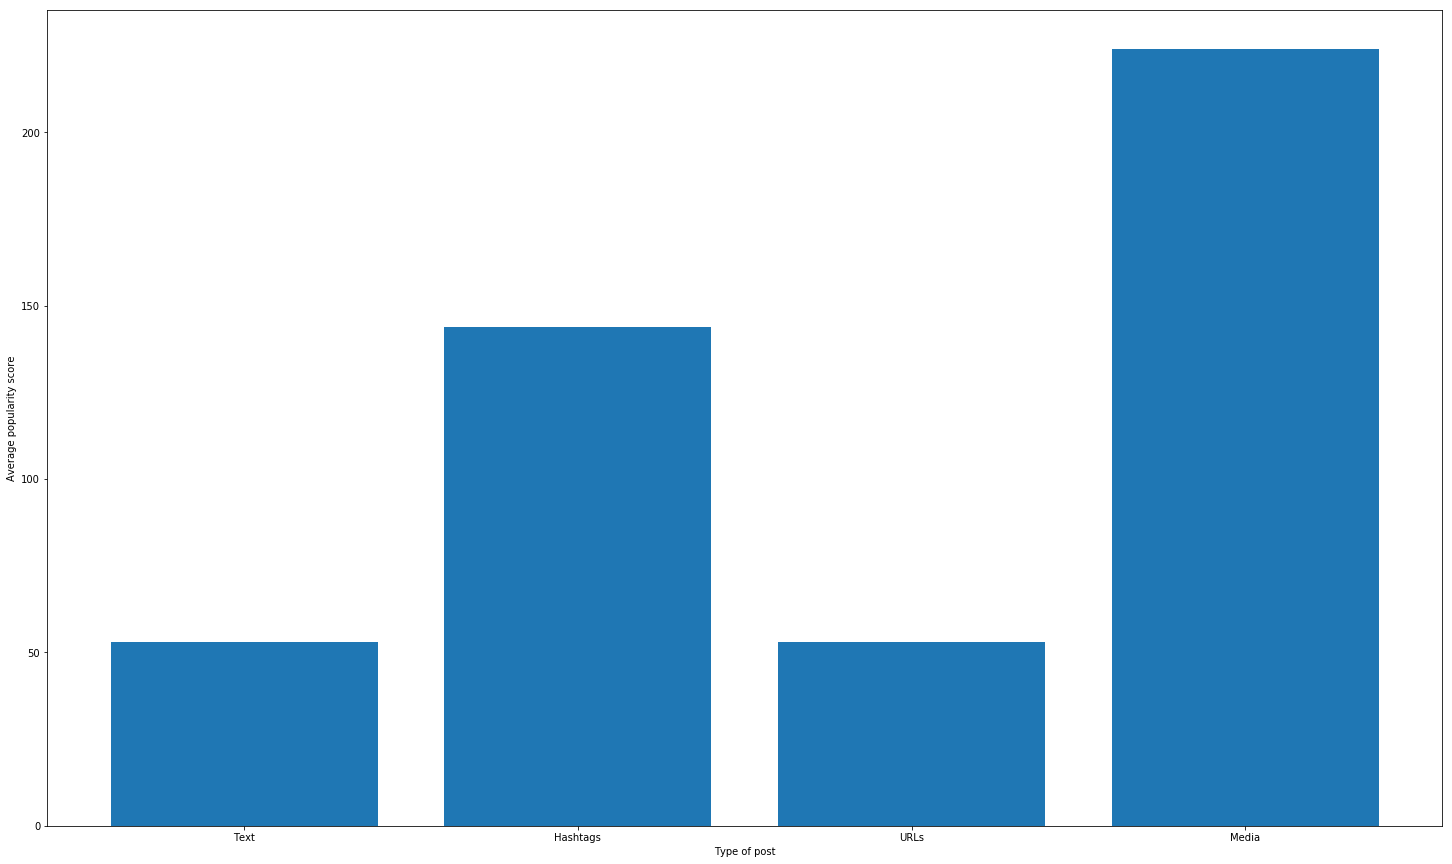

In [220]:
fig5 = plt.figure(figsize=(25, 15))
axes = plt.gca()
arrx = ['Text', 'Hashtags', 'URLs', 'Media']
arry = [sum(text)/len(text), sum(hashtags)/len(hashtags), sum(url)/len(url), sum(media)/len(media)]
plt.bar(arrx, arry)
plt.ylabel('Average popularity score')
plt.xlabel('Type of post')

#### Baltimore

In [221]:
hashtags = []
url = []
media = []
text = []
for data in blm_tweets:
    flg = 1
    if len(data['entities']['hashtags']) > 0:
        flg = 0
        hashtags.append(data['favorite_count']+3*data['retweet_count'])
    if len(data['entities']['urls']) > 0:
        flg = 0
        url.append(data['favorite_count']+3*data['retweet_count'])
    if 'media' in data['entities']:
        flg = 0
        media.append(data['favorite_count']+3*data['retweet_count'])
    if flg:
        text.append(data['favorite_count']+3*data['retweet_count'])

Text(0.5,0,u'Type of post')

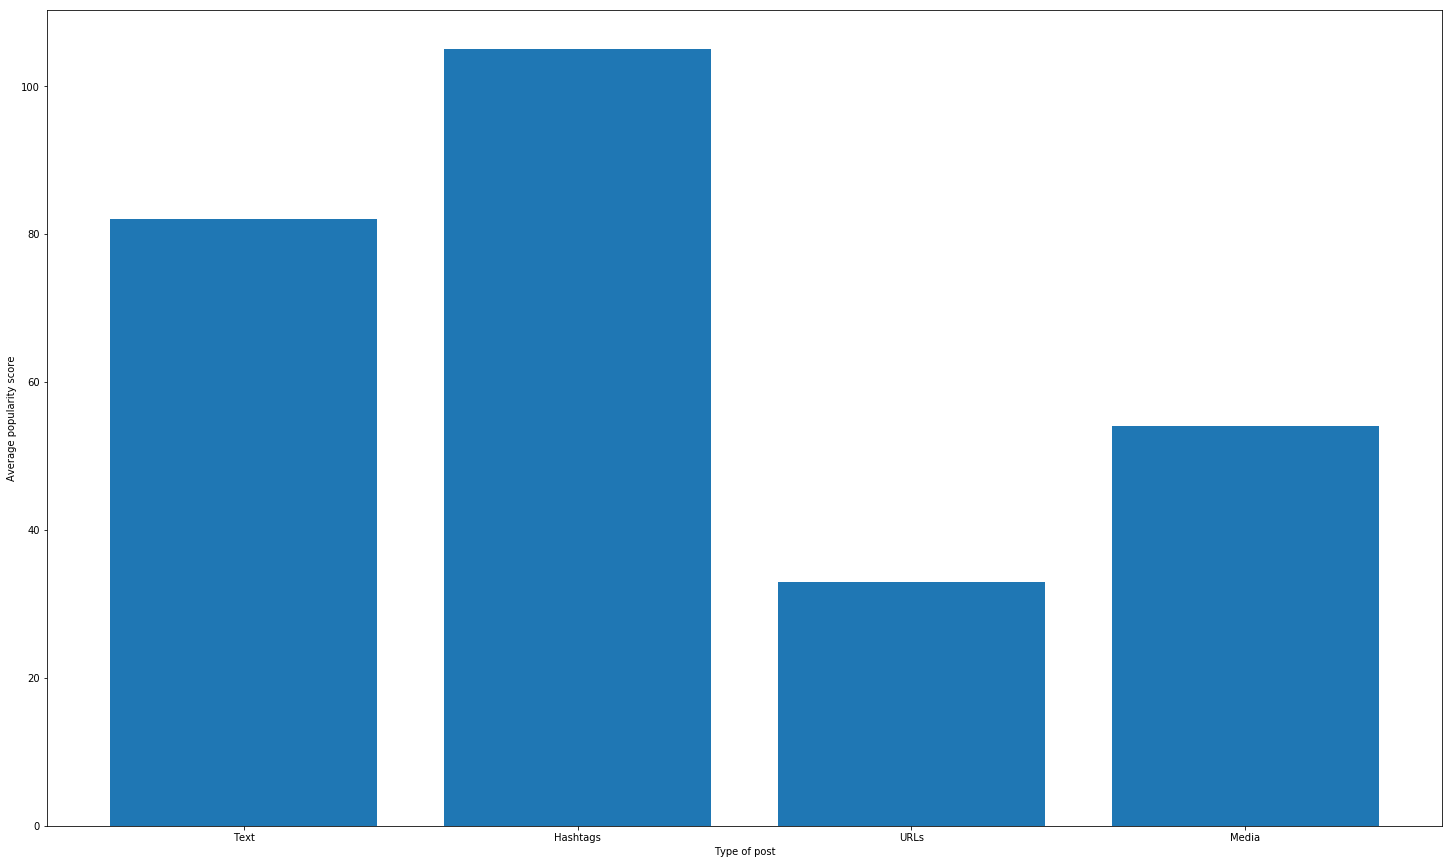

In [222]:
fig5 = plt.figure(figsize=(25, 15))
axes = plt.gca()
arrx = ['Text', 'Hashtags', 'URLs', 'Media']
arry = [sum(text)/len(text), sum(hashtags)/len(hashtags), sum(url)/len(url), sum(media)/len(media)]
plt.bar(arrx, arry)
plt.ylabel('Average popularity score')
plt.xlabel('Type of post')

### Most retweeted users

#### Baltimore

In [311]:
retweet_dic = {}
for data in blm_tweets:
    if "retweeted_status" in data and data['retweeted_status']['user']['screen_name']!="BaltimorePolice":
        if data['retweeted_status']['user']['screen_name'] in retweet_dic:
            retweet_dic[data['retweeted_status']['user']['screen_name']] += 1
        else:
            retweet_dic[data['retweeted_status']['user']['screen_name']] = 1
retweet_dic = collections.OrderedDict(sorted(retweet_dic.items(), reverse=True, key=lambda x: x[1]))
i = 0
for k, v in retweet_dic.items():
    print k
    i +=1 
    if i==10:
        break

MajorRichGibson
NWS_BaltWash
_MoBrown
RecruitmentBPD
progresslead
TJSmithMedia
BmoreCityDOT
JeremySilbert
BaltCoPolice
RabbiCT


#### Bangalore

In [312]:
retweet_dic = {}
for data in bnglr_tweets:
    if "retweeted_status" in data and data['retweeted_status']['user']['screen_name']!="BaltimorePolice":
        if data['retweeted_status']['user']['screen_name'] in retweet_dic:
            retweet_dic[data['retweeted_status']['user']['screen_name']] += 1
        else:
            retweet_dic[data['retweeted_status']['user']['screen_name']] = 1
retweet_dic = collections.OrderedDict(sorted(retweet_dic.items(), reverse=True, key=lambda x: x[1]))
i = 0
for k, v in retweet_dic.items():
    print k
    i +=1 
    if i==10:
        break

DCPWestBCP
DrParameshwara
DGP_FIRE
AddlCPTraffic
HMLokesh
KarFireDept
blrcitytraffic
ACP_TrafficEast
DCPEASTBCP
CCBBangalore


#### Inferences

##### Baltimore
MajorRichGibson is the head of Baltimore Police, NWS_BaltWash is the weather service in Baltimore. Perhaps the Police are warning about possible storms or heavy rainfalls. Similarly, Baltimore PD talk about recruiting new people and other social initiatives.

##### Bangalore
Simialr to Baaltimore, DCPWestBCP is the head of the police department. They talk about the fire department, traffic in Bangalore, crime branch, etc